#### Importing necessary libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Importing data

In [39]:
relative_path = os.path.join('..', 'cleaned_starting_file', 'drugs_cleaned.csv')

# Construct the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(absolute_path)

#### Viewing DataFrame

In [40]:
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX (Prescription),994,2.52,3.01,1.84,Levofloxacin is used to treat a variety of bac...
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX (Prescription),755,2.78,3.00,2.08,This is a generic drug. The average cash pric...
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX (Prescription),584,3.21,4.01,2.57,Azithromycin is an antibiotic (macrolide-type)...
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX (Prescription),437,3.26,3.23,2.42,Amoxicillin/clavulanic acid is a combination p...
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX (Prescription),361,2.44,2.96,1.68,Levofloxacin is used to treat a variety of bac...
...,...,...,...,...,...,...,...,...,...
1713,vulvovaginal candidiasis,Clotrimazole,On Label,OTC (Over-the-counter),2,5.00,5.00,5.00,Clotrimazole is used to treat skin infections ...
1714,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX (Prescription),1,5.00,5.00,5.00,This medication is used to treat vaginal yeast...
1715,vulvovaginal candidiasis,Clotrimazole,On Label,OTC (Over-the-counter),1,5.00,4.00,5.00,Clotrimazole is used to treat skin infections ...
1716,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC (Over-the-counter),1,5.00,5.00,5.00,This medication is used to treat vaginal yeast...


#### Making a function to add numbers above bins which will be reused

In [41]:

def add_numbers_above_bins(counts, bins):
    for count, bin in zip(counts, bins):
        plt.text(bin + (bins[1] - bins[0]) / 2, count + 0.5, int(count), ha='center', va='bottom')

#### Histogram based on 'Effective' column

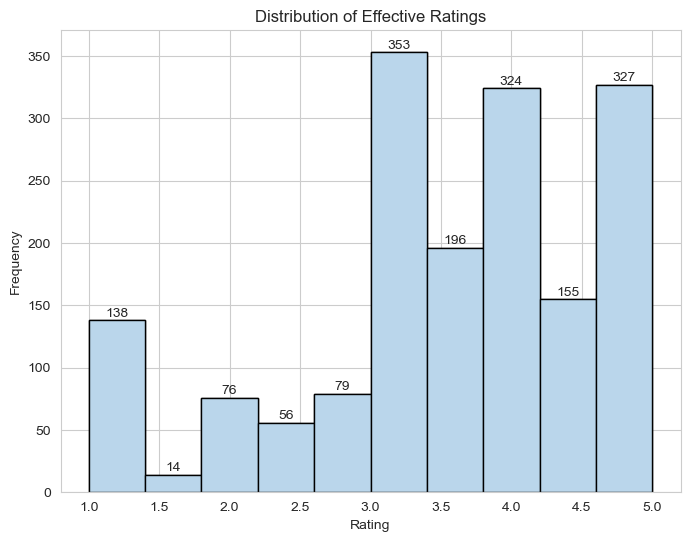

In [42]:
# Set palette for 'Effective' Ratings histogram
sns.set_palette("Blues")

# Histogram of 'Effective' Ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Effective'], bins=10, edgecolor='black')
plt.title('Distribution of Effective Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add numbers above bins
counts, bins, _ = plt.hist(df['Effective'], bins=10, edgecolor='black')
add_numbers_above_bins(counts, bins)

plt.show()


#### Histogram based on 'EaseOfUse' column

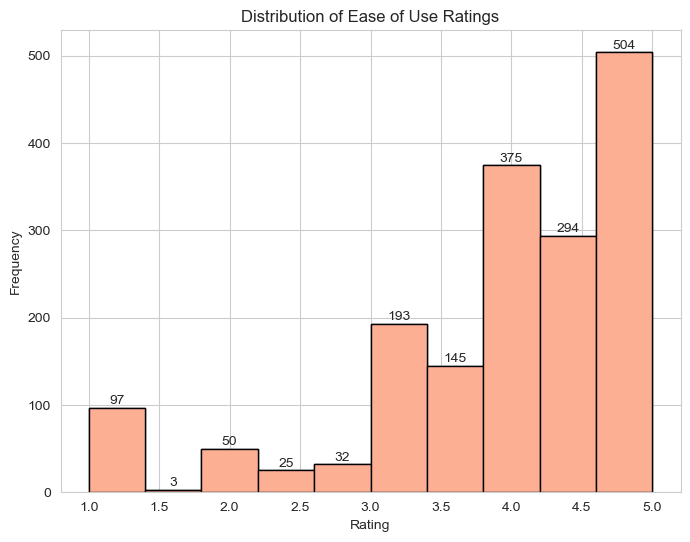

In [43]:
# Set palette for 'EaseOfUse' Ratings histogram
sns.set_palette("Reds")

plt.figure(figsize=(8, 6))
plt.hist(df['EaseOfUse'], bins=10, edgecolor='black')
plt.title('Distribution of Ease of Use Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add numbers above bins
counts, bins, _ = plt.hist(df['EaseOfUse'], bins=10, edgecolor='black')
add_numbers_above_bins(counts, bins)

plt.show()



#### Histogram based on 'Satisfaction' column

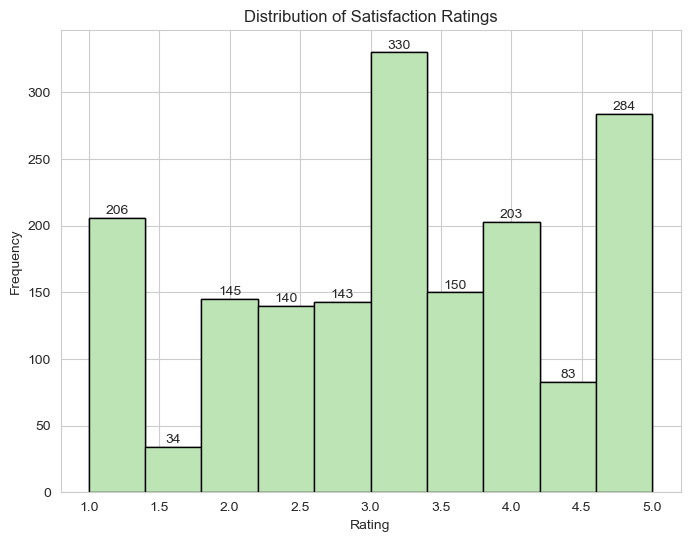

In [44]:
# Set palette for 'Satisfaction' Ratings histogram
sns.set_palette("Greens")

plt.figure(figsize=(8, 6))
plt.hist(df['Satisfaction'], bins=10, edgecolor='black')
plt.title('Distribution of Satisfaction Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Add numbers above bins
counts, bins, _ = plt.hist(df['Satisfaction'], bins=10, edgecolor='black')
add_numbers_above_bins(counts, bins)

plt.show()


#### Pie chart based on 'Indication' column

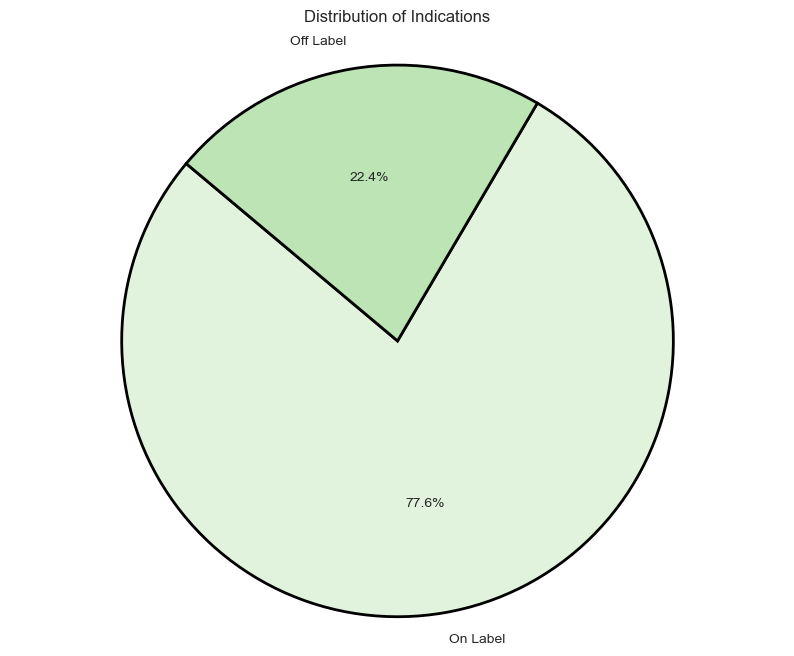

In [45]:
# Calculate value counts for each indication
indication_counts = df['Indication'].value_counts()

# Plot a pie chart with outline
plt.figure(figsize=(10, 8))
plt.pie(indication_counts, labels=indication_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.title('Distribution of Indications')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()




#### Bar chart based on 'Type' column

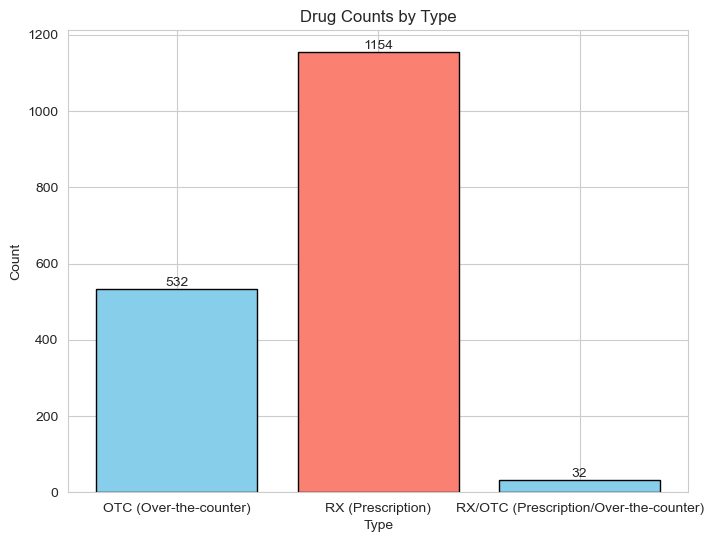

In [46]:
# Group the filtered DataFrame by the 'Type' column and count the number of drugs for each type
drug_counts = df.groupby('Type').size()

# Plot a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(drug_counts.index, drug_counts.values, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Drug Counts by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add numbers above bins
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom')

plt.show()

#### Viewing how many different drugs there are in 'Drug' column

In [47]:
num_unique_drugs = df['Drug'].nunique()
print(num_unique_drugs)

461


#### Showing drugs with least and most occurrences in 'Drug' column

In [55]:
# Count the occurrences of each drug in the entire DataFrame
drug_counts = df['Drug'].value_counts()

# Get the drug with the maximum occurrences and its count
max_occurrences_drug = drug_counts.idxmax()
max_occurrences_count = drug_counts.max()

print("Drug with the maximum occurrences:", max_occurrences_drug, "Count:", max_occurrences_count)

# Count the number of drugs that appear only once
num_single_occurrence_drugs = (drug_counts == 1).sum()

print("Number of drugs that appear only once in the DataFrame:", num_single_occurrence_drugs)

Drug with the maximum occurrences: Acetaminophen Count: 79
Number of drugs that appear only once in the DataFrame: 129


#### Bar chart based on top 20 values from 'Drug' column

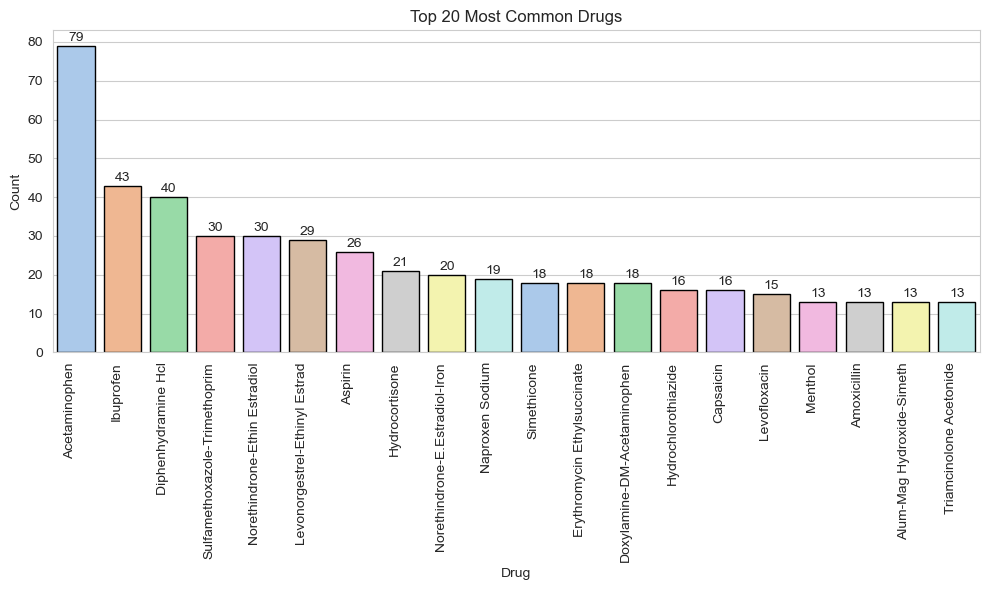

In [50]:
# Count the number of occurrences of each drug and get the top 20
top_20_drugs = df['Drug'].value_counts().head(20)

# Plot a bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_drugs.index, y=top_20_drugs.values, palette='pastel', edgecolor='black')
plt.title('Top 20 Most Common Drugs')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add numbers above bins
for bar, count in zip(plt.gca().patches, top_20_drugs.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(count)), ha='center', va='bottom')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()